In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.datasets import load_files

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from statsmodels.tools.eval_measures import mse, rmse
from wordcloud import WordCloud
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import neighbors
from IPython.display import Image


import pydotplus
from sklearn import ensemble

import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')
import time
import cv2
import glob

In [2]:
happy_df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')


In [3]:
df_happy = happy_df

In [4]:
print(
    df_happy.head(),
    df_happy.info(),
    df_happy.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB
  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4 

In [5]:
missing_values_ratios = (df_happy.isnull().sum()/df_happy.isnull().count())
missing_values_ratios.sort_values(ascending=False).head()

agea       0.027810
sclact     0.010938
pplfair    0.004538
happy      0.003607
pplhlp     0.002909
dtype: float64

In [6]:
df_happy.dropna(inplace=True)

In [7]:
print(
    df_happy.head(),
    df_happy.info(),
    df_happy.describe()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB
  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4 

In [8]:
df_happy['year'].value_counts()

7    4076
6    4071
Name: year, dtype: int64

In [9]:
df_happy_year6 = df_happy[df_happy['year']==6]
df_happy_year7 = df_happy[df_happy['year']==7]

print(df_happy_year6.shape)
print(df_happy_year7.shape)

(4071, 13)
(4076, 13)


In [25]:
df_happy_year7=df_happy_year7.drop([8589, 8590, 8591, 8592, 8593])

In [26]:
print(df_happy_year6.shape)
print(df_happy_year7.shape)

(4071, 13)
(4071, 13)


In [10]:
df_happy['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

## Question 1

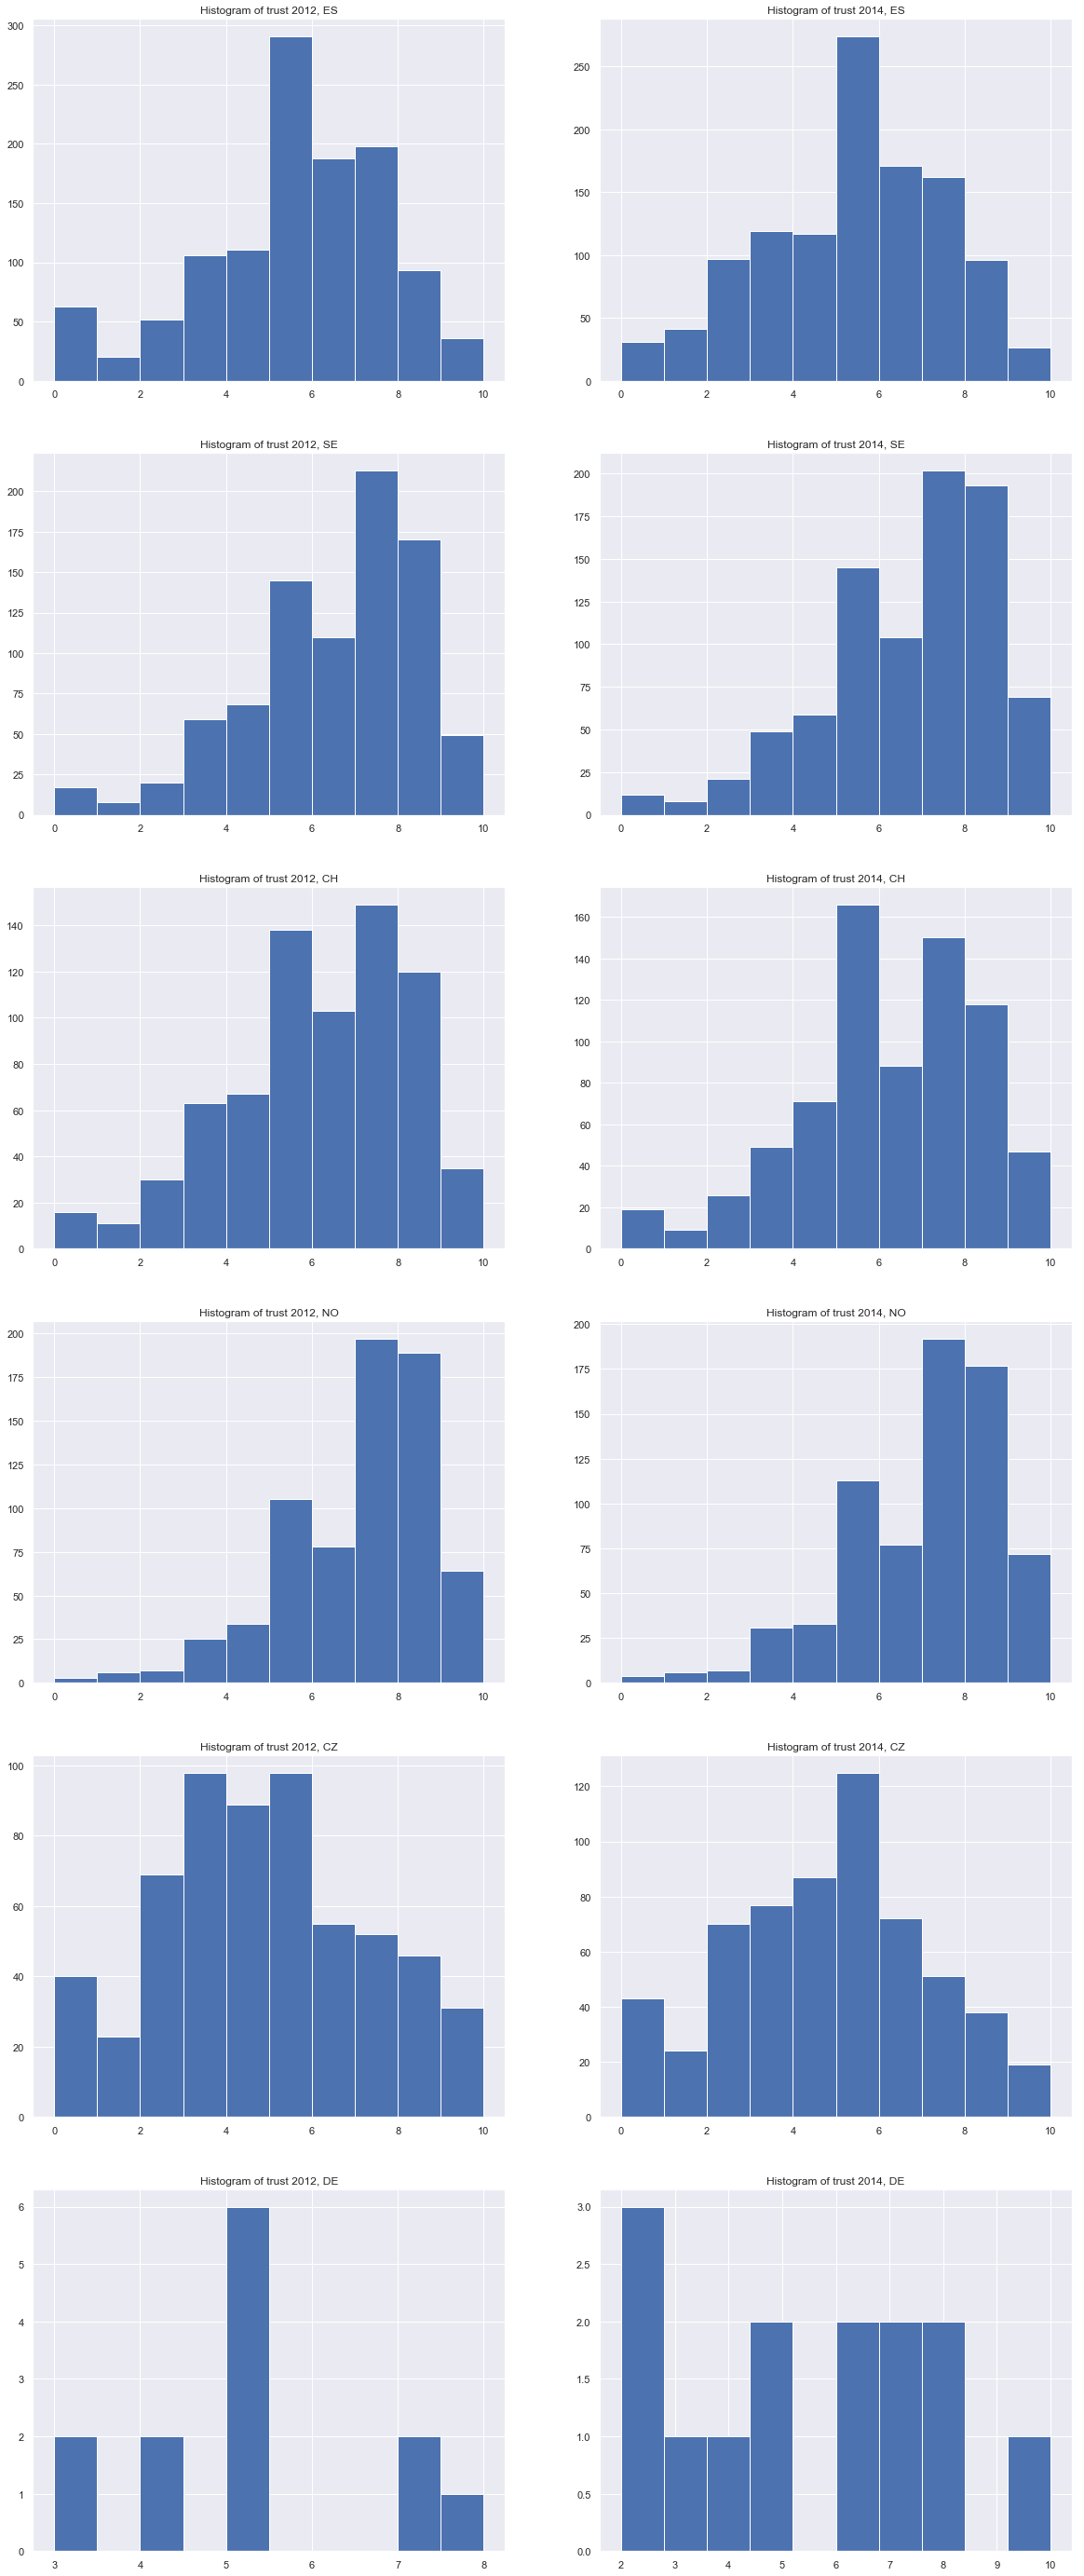

In [27]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='ES'].ppltrst)
plt.title("Histogram of trust {}".format("2012, ES"))


plt.subplot(6,2,2)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='ES'].ppltrst)
plt.title("Histogram of trust {}".format("2014, ES"))


plt.subplot(6,2,3)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='SE'].ppltrst)
plt.title("Histogram of trust {}".format("2012, SE"))


plt.subplot(6,2,4)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='SE'].ppltrst)
plt.title("Histogram of trust {}".format("2014, SE"))


plt.subplot(6,2,5)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='CH'].ppltrst)
plt.title("Histogram of trust {}".format("2012, CH"))


plt.subplot(6,2,6)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='CH'].ppltrst)
plt.title("Histogram of trust {}".format("2014, CH"))


plt.subplot(6,2,7)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='NO'].ppltrst)
plt.title("Histogram of trust {}".format("2012, NO"))


plt.subplot(6,2,8)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='NO'].ppltrst)
plt.title("Histogram of trust {}".format("2014, NO"))


plt.subplot(6,2,9)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='CZ'].ppltrst)
plt.title("Histogram of trust {}".format("2012, CZ"))


plt.subplot(6,2,10)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='CZ'].ppltrst)
plt.title("Histogram of trust {}".format("2014, CZ"))


plt.subplot(6,2,11)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='DE'].ppltrst)
plt.title("Histogram of trust {}".format("2012, DE"))


plt.subplot(6,2,12)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='DE'].ppltrst)
plt.title("Histogram of trust {}".format("2014, DE"))

                        
plt.show()

In [32]:
df_happy_year6_ES_ppltrust = df_happy_year6[df_happy_year6['cntry']=='ES'].ppltrst
df_happy_year7_ES_ppltrust = df_happy_year7[df_happy_year7['cntry']=='ES'].ppltrst

In [38]:
df_happy_year6_SE_ppltrust = df_happy_year6[df_happy_year6['cntry']=='SE'].ppltrst
df_happy_year7_SE_ppltrust = df_happy_year7[df_happy_year7['cntry']=='SE'].ppltrst

In [42]:
df_happy_year6_CH_ppltrust = df_happy_year6[df_happy_year6['cntry']=='CH'].ppltrst
df_happy_year7_CH_ppltrust = df_happy_year7[df_happy_year7['cntry']=='CH'].ppltrst

In [45]:
df_happy_year6_NO_ppltrust = df_happy_year6[df_happy_year6['cntry']=='NO'].ppltrst
df_happy_year7_NO_ppltrust = df_happy_year7[df_happy_year7['cntry']=='NO'].ppltrst

In [46]:
print(len(df_happy_year6_NO_ppltrust), 
      len(df_happy_year7_NO_ppltrust))

708 712


In [49]:
print(stats.ttest_rel(df_happy_year6_NO_ppltrust, 
                      df_happy_year7_NO_ppltrust.drop(df_happy_year7_NO_ppltrust.index[0:4])))

Ttest_relResult(statistic=0.49348485134086584, pvalue=0.6218232957577072)


In [41]:
print(stats.ttest_rel(df_happy_year6_ES_ppltrust.drop(df_happy_year6_ES_ppltrust.index[0:24]), 
                      df_happy_year7_ES_ppltrust))

Ttest_relResult(statistic=1.9882012752038416, pvalue=0.04702974511143739)


In [50]:
print(stats.ttest_rel(df_happy_year6_SE_ppltrust, 
                      df_happy_year7_SE_ppltrust.drop(df_happy_year7_SE_ppltrust.index[0:3])
                      ))

Ttest_relResult(statistic=-2.159993609481147, pvalue=0.03104950187332974)


In [51]:
print(stats.ttest_rel(df_happy_year6_CH_ppltrust, 
                      df_happy_year7_CH_ppltrust.drop(df_happy_year7_CH_ppltrust.index[0:11]) 
                      ))

Ttest_relResult(statistic=-0.6554034640830768, pvalue=0.5124142214575805)


Using the paired t-test for dependent groups, analysis shows that people's trust has shifted statistically between 2012 and 2014 (p < 1 in every tested case), although some countries have become more trusting and others have become less trusting.

## Question 2

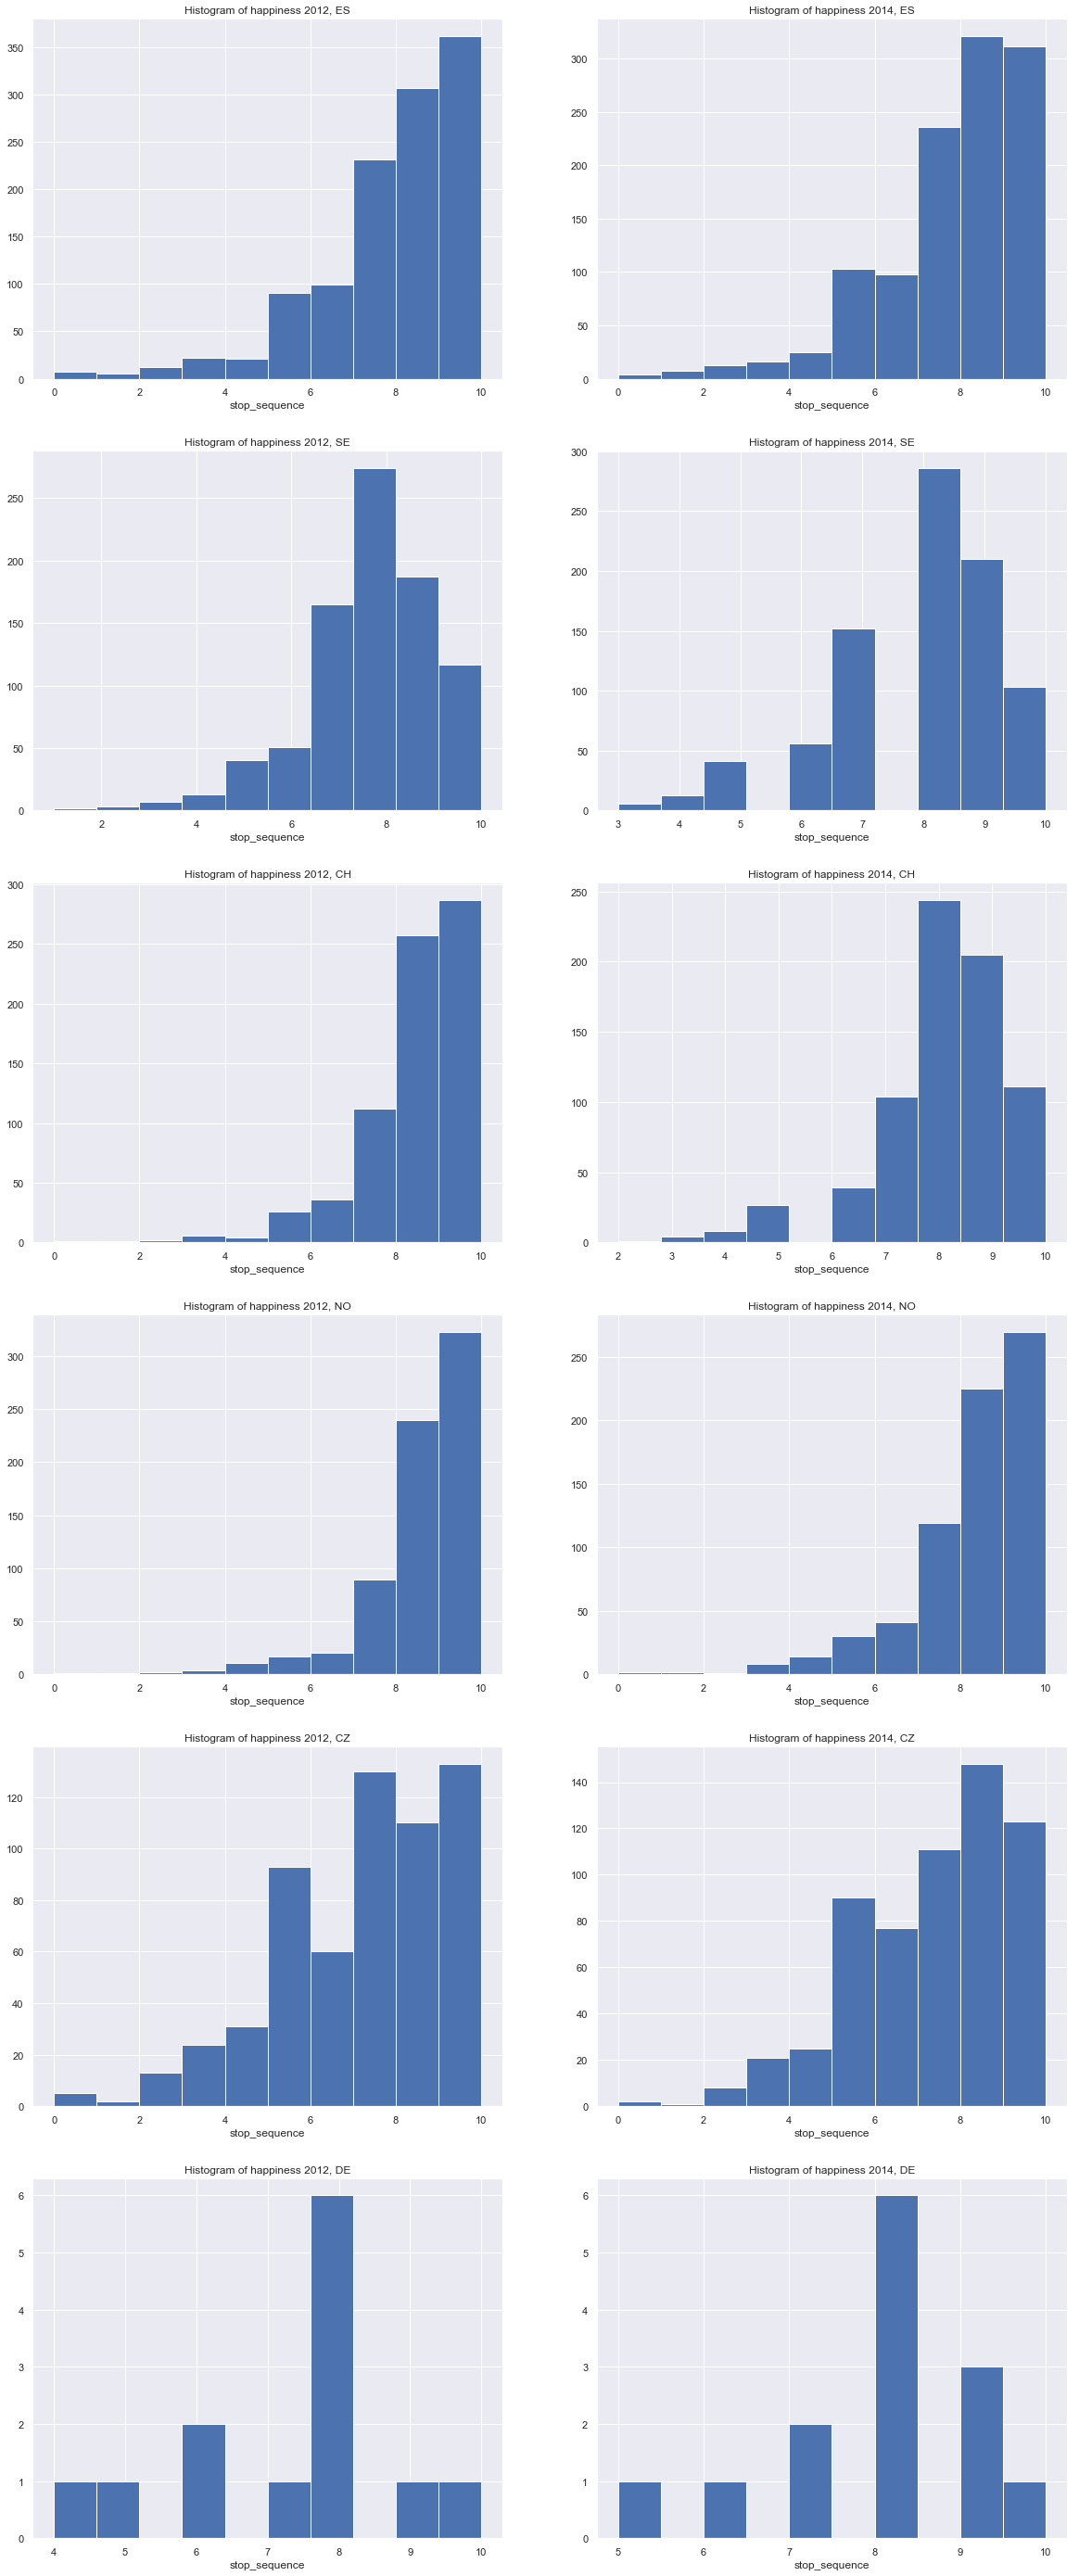

In [30]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='ES'].happy)
plt.title("Histogram of happiness {}".format("2012, ES"))


plt.subplot(6,2,2)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='ES'].happy)
plt.title("Histogram of happiness {}".format("2014, ES"))


plt.subplot(6,2,3)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='SE'].happy)
plt.title("Histogram of happiness {}".format("2012, SE"))


plt.subplot(6,2,4)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='SE'].happy)
plt.title("Histogram of happiness {}".format("2014, SE"))


plt.subplot(6,2,5)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='CH'].happy)
plt.title("Histogram of happiness {}".format("2012, CH"))


plt.subplot(6,2,6)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='CH'].happy)
plt.title("Histogram of happiness {}".format("2014, CH"))


plt.subplot(6,2,7)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='NO'].happy)
plt.title("Histogram of happiness {}".format("2012, NO"))


plt.subplot(6,2,8)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='NO'].happy)
plt.title("Histogram of happiness {}".format("2014, NO"))


plt.subplot(6,2,9)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='CZ'].happy)
plt.title("Histogram of happiness {}".format("2012, CZ"))


plt.subplot(6,2,10)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='CZ'].happy)
plt.title("Histogram of happiness {}".format("2014, CZ"))


plt.subplot(6,2,11)
plt.hist(df_happy_year6[df_happy_year6['cntry']=='DE'].happy)
plt.title("Histogram of happiness {}".format("2012, DE"))


plt.subplot(6,2,12)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='DE'].happy)
plt.title("Histogram of happiness {}".format("2014, DE"))

                        
plt.show()

In [52]:
df_happy_year6_ES_happy = df_happy_year6[df_happy_year6['cntry']=='ES'].happy
df_happy_year7_ES_happy = df_happy_year7[df_happy_year7['cntry']=='ES'].happy

In [53]:
df_happy_year6_SE_happy = df_happy_year6[df_happy_year6['cntry']=='SE'].happy
df_happy_year7_SE_happy = df_happy_year7[df_happy_year7['cntry']=='SE'].happy

In [54]:
df_happy_year6_CH_happy = df_happy_year6[df_happy_year6['cntry']=='CH'].happy
df_happy_year7_CH_happy = df_happy_year7[df_happy_year7['cntry']=='CH'].happy

In [55]:
df_happy_year6_NO_happy = df_happy_year6[df_happy_year6['cntry']=='NO'].happy
df_happy_year7_NO_happy = df_happy_year7[df_happy_year7['cntry']=='NO'].happy

In [58]:
print(len(df_happy_year6_ES_happy), 
      len(df_happy_year7_ES_happy))

1158 1134


In [57]:
print(stats.ttest_rel(df_happy_year6_NO_happy, 
                      df_happy_year7_NO_happy.drop(df_happy_year7_NO_happy.index[0:4])))

Ttest_relResult(statistic=4.1315617752339495, pvalue=4.0344911722152695e-05)


In [59]:
print(stats.ttest_rel(df_happy_year6_ES_happy.drop(df_happy_year6_ES_happy.index[0:24]), 
                      df_happy_year7_ES_happy))

Ttest_relResult(statistic=1.2750643816525218, pvalue=0.20254785457624389)


In [60]:
print(stats.ttest_rel(df_happy_year6_SE_happy, 
                      df_happy_year7_SE_happy.drop(df_happy_year7_SE_happy.index[0:3])
                      ))

Ttest_relResult(statistic=-0.5538110648268781, pvalue=0.5798524494177313)


In [61]:
print(stats.ttest_rel(df_happy_year6_CH_happy, 
                      df_happy_year7_CH_happy.drop(df_happy_year7_CH_happy.index[0:11]) 
                      ))

Ttest_relResult(statistic=-0.787634274940356, pvalue=0.4311659692732065)


Two of the countries tested show a statistical increase in happiness and two show a decrease.

## Question 3

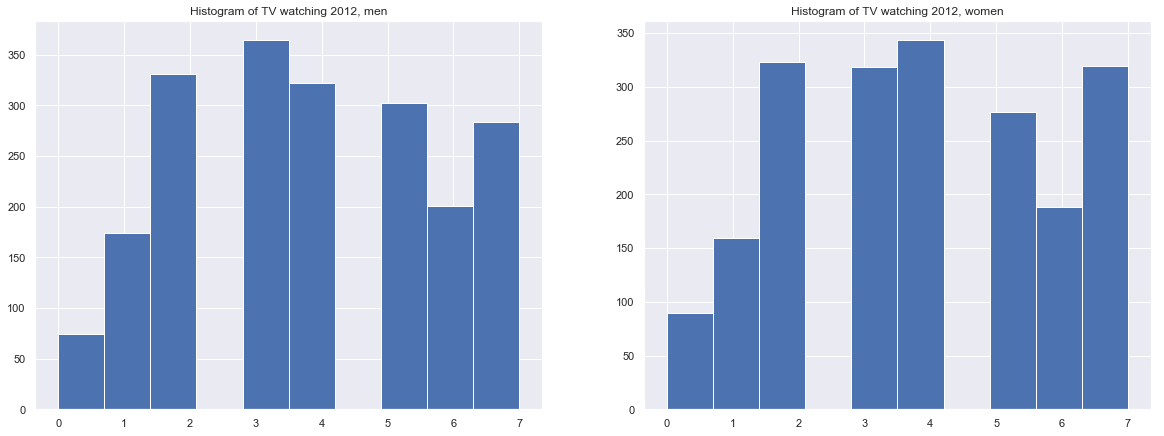

In [32]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.hist(df_happy_year6[df_happy_year6['gndr']==1].tvtot)
plt.title("Histogram of TV watching {}".format("2012, men"))


plt.subplot(6,2,2)
plt.hist(df_happy_year6[df_happy_year6['gndr']==2].tvtot)
plt.title("Histogram of TV watching {}".format("2012, women"))

plt.show()

In [62]:
df_men_2012_tv = df_happy_year6[df_happy_year6['gndr']==1].tvtot
df_women_2012_tv = df_happy_year6[df_happy_year6['gndr']==2].tvtot

In [63]:
print(len(df_men_2012_tv), 
      len(df_women_2012_tv))

2053 2018


In [65]:
print(stats.ttest_ind((df_men_2012_tv.drop(df_men_2012_tv.index[0:35])), 
                      df_women_2012_tv))

Ttest_indResult(statistic=-0.43085921729948706, pvalue=0.6665937586854983)


An independent t-test indicates that women watched slightly more TV in 2012 among the countries sampled.

## Question 4

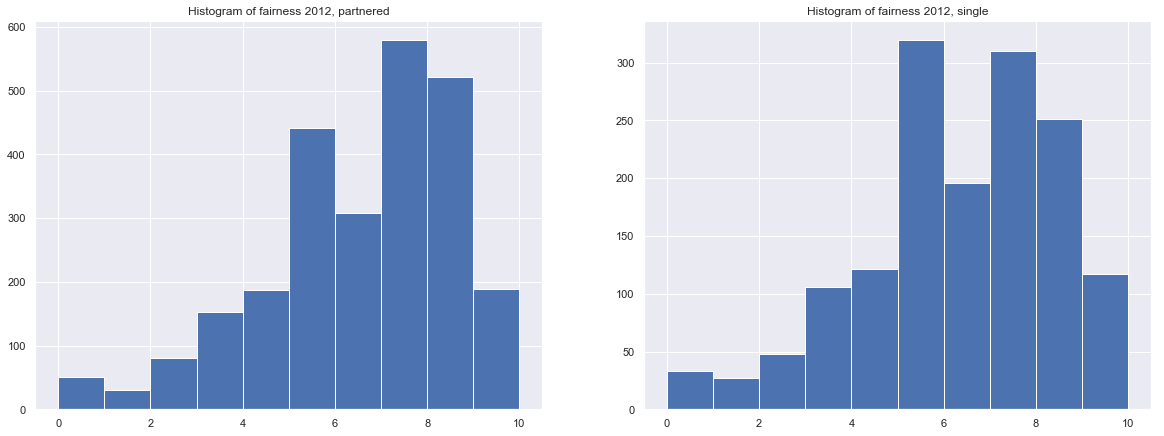

In [34]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.hist(df_happy_year6[df_happy_year6['partner']==1].pplfair)
plt.title("Histogram of fairness {}".format("2012, partnered"))


plt.subplot(6,2,2)
plt.hist(df_happy_year6[df_happy_year6['partner']==2].pplfair)
plt.title("Histogram of fairness {}".format("2012, single"))

plt.show()

In [159]:
df_partnered_2012_fair = df_happy_year6[df_happy_year6['partner']==1].pplfair
df_single_2012_fair = df_happy_year6[df_happy_year6['partner']==2].pplfair

In [160]:
print(len(df_partnered_2012_fair), 
      len(df_single_2012_fair))

2542 1529


In [176]:
print(stats.ttest_ind(df_partnered_2012_fair, 
                      df_single_2012_fair, equal_var = False))

Ttest_indResult(statistic=3.0303791211817925, pvalue=0.0024621559909123823)


An independent Welch's t-test indicates that partnered people are more likely to evaluate people as fair than single people.

## Question 5

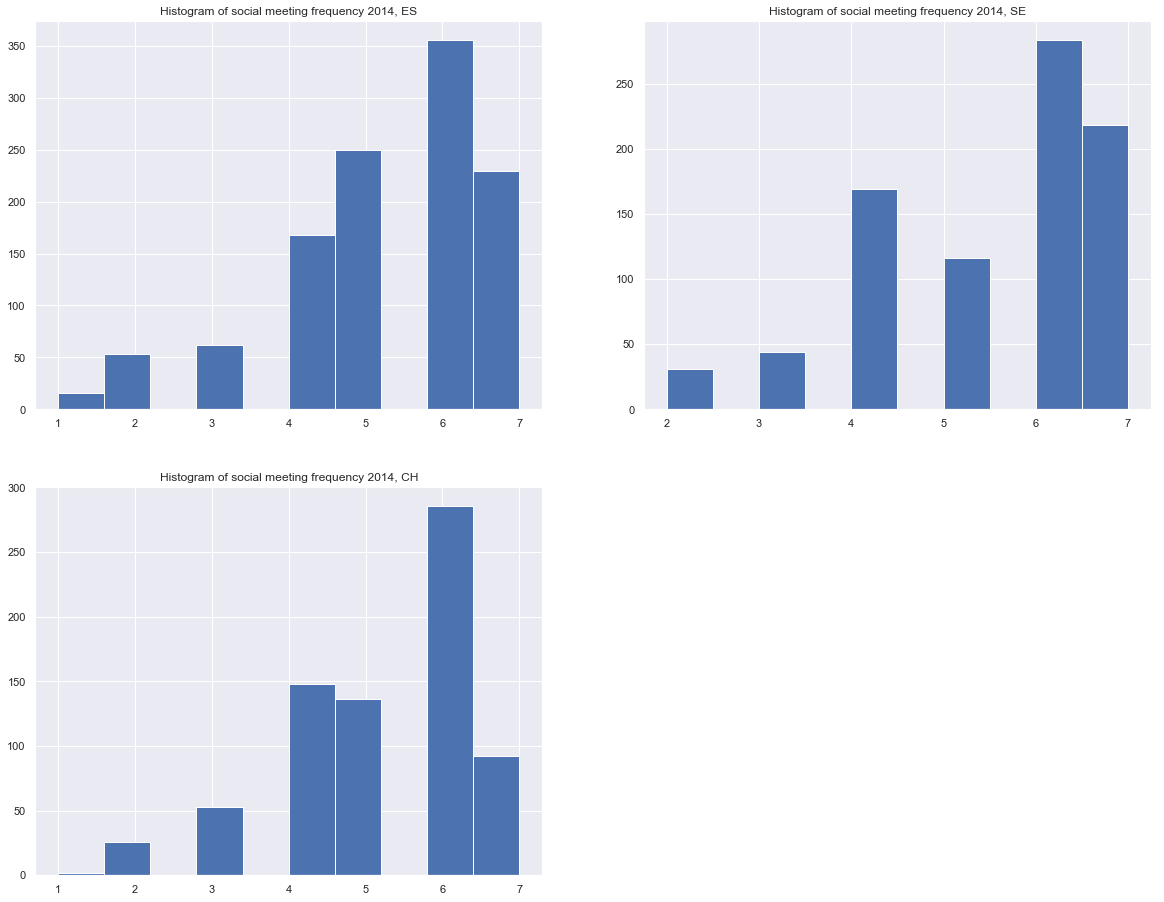

In [180]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='ES'].sclmeet)
plt.title("Histogram of social meeting frequency {}".format("2014, ES"))

plt.subplot(6,2,2)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='SE'].sclmeet)
plt.title("Histogram of social meeting frequency {}".format("2014, SE"))

plt.subplot(6,2,3)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='CH'].sclmeet)
plt.title("Histogram of social meeting frequency {}".format("2014, CH"))

plt.show()

In [178]:
F, p = stats.f_oneway(
    df_happy_year7[df_happy_year7['cntry']=='ES'].sclmeet,
    df_happy_year7[df_happy_year7['cntry']=='SE'].sclmeet,
    df_happy_year7[df_happy_year7['cntry']=='CH'].sclmeet)

# The F statistic.
print(F)

# The probability.
print(p)

7.1591782282015535
0.0007923477341186611


A one-way ANOVA test indicates significant statistical differences among the three countries wrt social meeting frequency.  Visual inspection of the histograms suggests SE is the most social country and CH is the least.

## Question 6

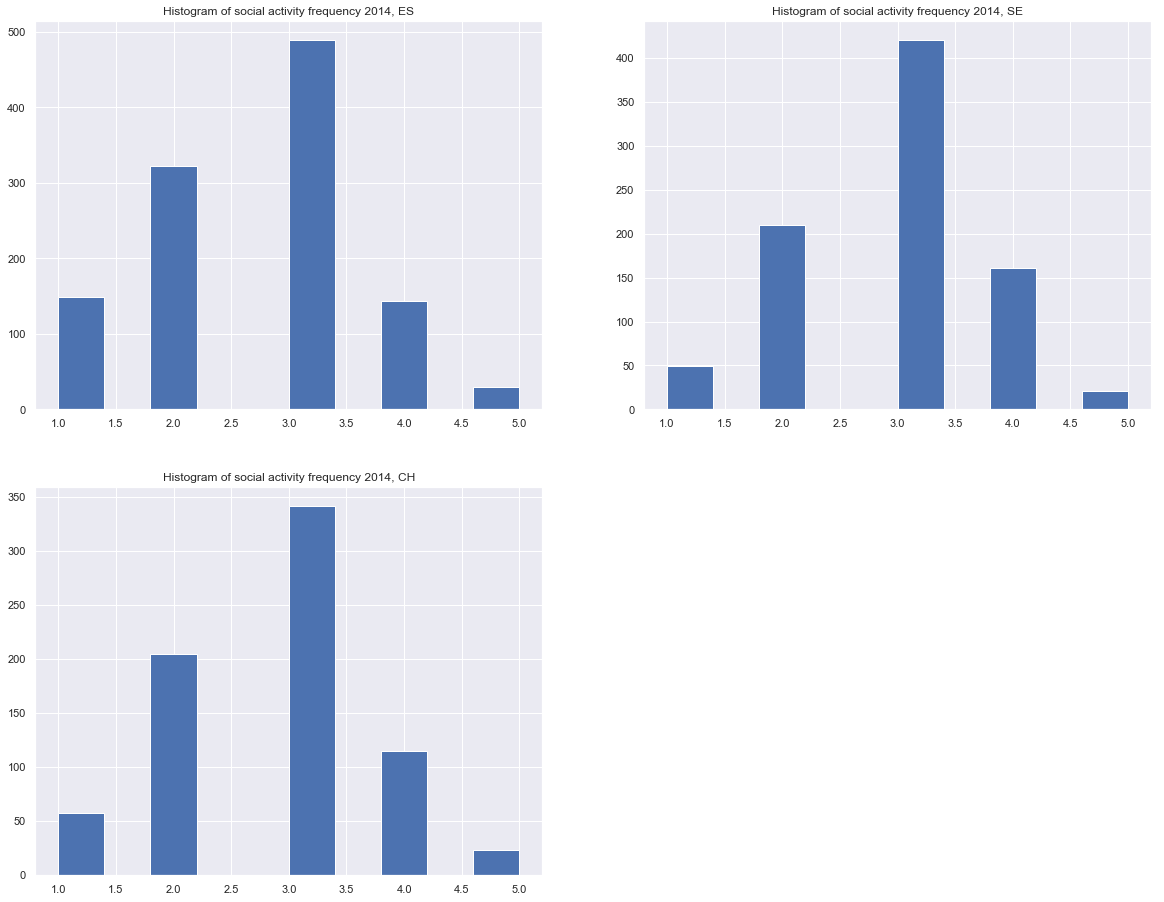

In [181]:
plt.figure(figsize=(20,50))

plt.subplot(6,2,1)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='ES'].sclact)
plt.title("Histogram of social activity frequency {}".format("2014, ES"))

plt.subplot(6,2,2)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='SE'].sclact)
plt.title("Histogram of social activity frequency {}".format("2014, SE"))

plt.subplot(6,2,3)
plt.hist(df_happy_year7[df_happy_year7['cntry']=='CH'].sclact)
plt.title("Histogram of social activity frequency {}".format("2014, CH"))

plt.show()


In [179]:
F, p = stats.f_oneway(
    df_happy_year7[df_happy_year7['cntry']=='ES'].sclact,
    df_happy_year7[df_happy_year7['cntry']=='SE'].sclact,
    df_happy_year7[df_happy_year7['cntry']=='CH'].sclact)

# The F statistic.
print(F)

# The probability.
print(p)

18.673514138259655
8.811454456819049e-09


In [184]:
print(stats.ttest_ind(df_happy_year7[df_happy_year7['cntry']=='ES'].sclact, 
                      df_happy_year7[df_happy_year7['cntry']=='SE'].sclact)
     
     )

print(stats.ttest_ind(df_happy_year7[df_happy_year7['cntry']=='ES'].sclact, 
                      df_happy_year7[df_happy_year7['cntry']=='CH'].sclact)
     
     )

print(stats.ttest_ind(df_happy_year7[df_happy_year7['cntry']=='SE'].sclact, 
                      df_happy_year7[df_happy_year7['cntry']=='CH'].sclact)
     
     )

Ttest_indResult(statistic=-5.982042099365075, pvalue=2.6052454121671693e-09)
Ttest_indResult(statistic=-3.478987931157087, pvalue=0.0005148090072335817)
Ttest_indResult(statistic=2.117773964680029, pvalue=0.0343477888439434)


A one-way ANOVA indicates statistical differences among the three countires wrt social activty frequency.  Comparison of all three groups with an indepedent t-test shows that country SE has the highest social activty frequncy, while ES has the lowest.